# WEEK 4 ACTIVITY

## Carry out Visualization for the following questions:

#### 1) Compare churn count with respect to gender. 
#### 2) Find out how many female senior citizens there in the dataset 
#### 3) Compare 'tenure' with 'Total Charges' 
#### 4) Find out which contract preffered by the senior citizen. 
#### 5) Comment on your finds on Payment Method? 

In [2]:
#importing dependencies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the 'Telco-Customer-Churn.xls' file using read_excel()
pdata=pd.read_excel('Telco-Customer-Churn.xlsx')
pdata.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#High Level Statistics
pdata.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Findings:

1. We see that there are no Null Values in the dataframe.
2. But, the Total Charges column which has float values in the display is shown to have object dtype.
3. We need to cast the values to float dtype.

In [5]:
#converting total charges column dtype to float 
pdata['TotalCharges'] = pd.to_numeric(pdata['TotalCharges'], errors ='coerce')
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#After changing the dtype, we see that the total charges has about 11 NaN values
print("Number of NaN is the TotalCharges column:",pdata['TotalCharges'].isna().sum())

Number of NaN is the TotalCharges column: 11


In [7]:
#displaying the rows with NaN values for the TotalCharges column
pdata[pdata['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
pdata.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
#Now, we have to fill the NaN values using mean which is the best strategy here
pdata['TotalCharges'] = pdata['TotalCharges'].fillna(pdata['TotalCharges'].mean())


In [10]:
#we check for null values again
pdata[pdata['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


* There are no more null values

## 1) Compare churn count with respect to gender.

**Domain Knowledge:**

Customer churn means shifting from one service provider to its competitor in the market. <br>
Customer churn is one of the biggest fears of any industry, particularly for the telecom industry. 

In [12]:
#grouping the customers based on their gender 
df_gender = pdata.groupby('gender')['Churn'].count()
pdata.groupby('gender')['Churn'].count()

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

In [15]:
#churn count
f_churn = ((pdata['gender'] == 'Female') & (pdata['Churn'] == 'Yes')).sum()
m_churn = ((pdata['gender'] == 'Male') & (pdata['Churn'] == 'Yes')).sum()
print("{} of the total {} Female Customers shifted Telco to some other service provider.".format(f_churn,df_gender[0]))
print("{} of the total {} Male Customers shifted Telco to some other service provider.".format(m_churn,df_gender[1]))

939 of the total 3488 Female Customers shifted Telco to some other service provider.
930 of the total 3555 Male Customers shifted Telco to some other service provider.


In [16]:
print("A total of {} customers shifted from Telco to some other service provider.".format((m_churn+f_churn)))
print("The shift is about {} % of the total customers in the data.".format(round(((m_churn+f_churn)/pdata.shape[0])*100),2))

A total of 1869 customers shifted from Telco to some other service provider.
The shift is about 27 % of the total customers in the data.


In [17]:
perc_gender = pdata["gender"].value_counts(normalize=True)
perc_gender

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

In [18]:
#percentage of customer-based on gender 
print("{} % of the customers are Male.".format(round(perc_gender[0]*100,2)))
print("{} % of the customers are Female.".format(round(perc_gender[1]*100,2)))

50.48 % of the customers are Male.
49.52 % of the customers are Female.


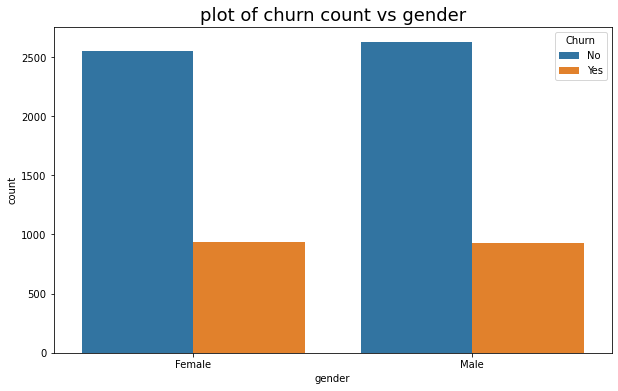

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender',hue='Churn',data=pdata)
plt.title('plot of churn count vs gender',fontsize=18)
plt.show()

### Findings

1. From the count, we see that of out of 7043 customers, 3488 are Female and 3555 are Male.
2. 50.48 % of the customers are Male while 49.52 % of the customers are Female.
3. 939 of the total 3488 Female Customers shifted Telco to some other service provider.
4. 930 of the total 3555 Male Customers shifted Telco to some other service provider.
5. A total of of 27 % customers shifted the service.
6. The amount of churn as well as customer count is almost the same in both genders. 
7. Hence, the data is nearly balanced.
    


## 2) Find out how many female senior citizens there in the dataset 

In [19]:
pdata.groupby(["gender", "SeniorCitizen"])['customerID'].count()

gender  SeniorCitizen
Female  0                2920
        1                 568
Male    0                2981
        1                 574
Name: customerID, dtype: int64

No.of female SeniorCitizen = 568

In [20]:
#visualizing the count of Female Senior Citizens 
new_df = pdata[pdata['gender'] == 'Female']

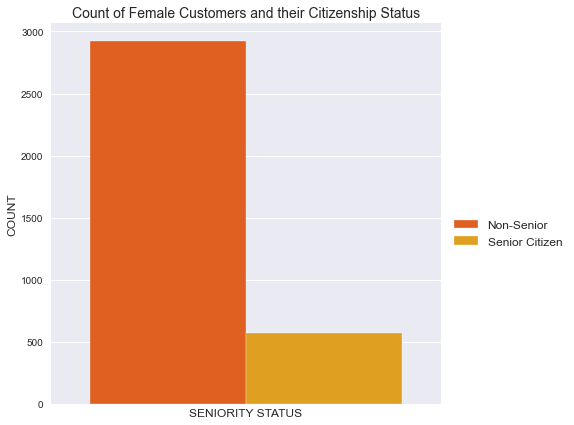

In [21]:
plt.figure(figsize=(7,7))
labels = ['Non-Senior','Senior Citizen']
sns.set_style("darkgrid")
sns.countplot(x='gender', data=new_df, palette='autumn',hue='SeniorCitizen')
plt.title("Count of Female Customers and their Citizenship Status",fontsize=14)
plt.xlabel("SENIORITY STATUS",fontsize=12)
plt.ylabel("COUNT",fontsize=12)
plt.xticks([], [])
plt.legend(['Non-Senior','Senior Citizen'],loc=(1.02,0.4),fontsize=12)
plt.show()

### Another Method

In [22]:
sc_df = pdata[pdata['SeniorCitizen']==1]

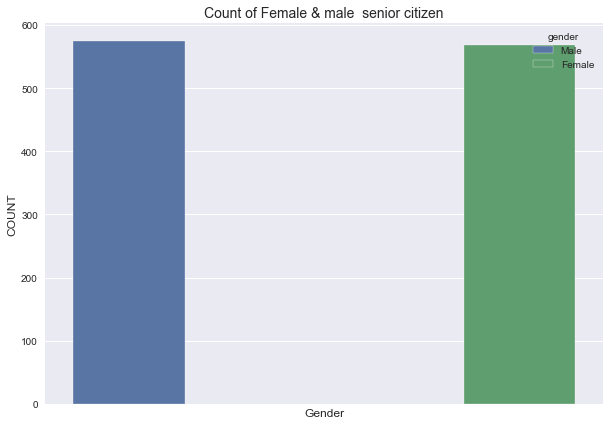

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',hue='gender',data=sc_df)

plt.title("Count of Female & male  senior citizen",fontsize=14)
plt.xlabel("Gender",fontsize=12)
plt.ylabel("COUNT",fontsize=12)
plt.xticks([], [])
plt.show()

**Among 1142 senior citizen 568 were females.**

## 3) Compare 'tenure' with 'Total Charges' 

In [24]:
pdata.loc[:,['tenure', 'TotalCharges']]

,tenure,TotalCharges
0,1,29.85
1,34,1889.50
2,2,108.15
3,45,1840.75
4,2,151.65
...,...,...
7038,24,1990.50
7039,72,7362.90
7040,11,346.45
7041,4,306.60


**Histogram for Tenure and TotalCharges**

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

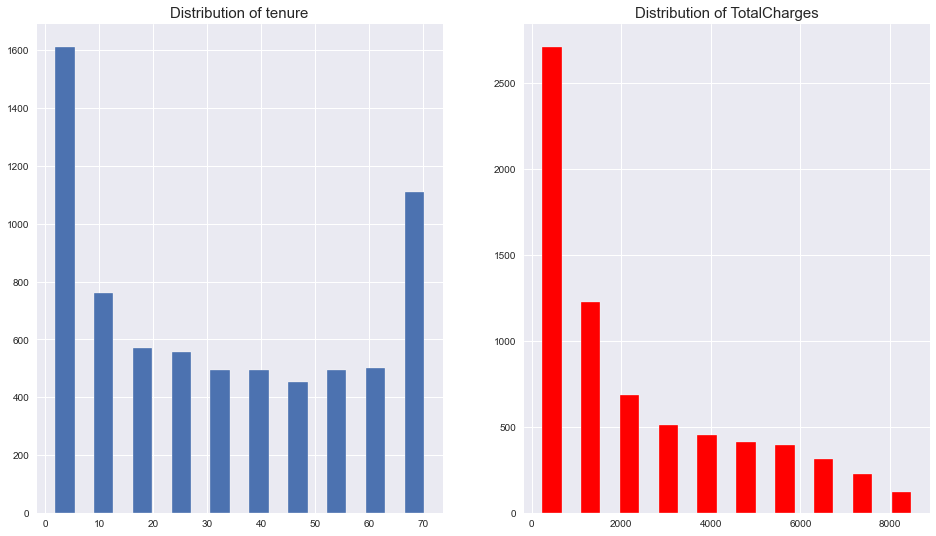

In [25]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.hist(pdata['tenure'],rwidth=0.5,)
plt.title('Distribution of tenure',fontsize=15)
plt.xticks()
plt.yticks()
 
plt.subplot(1,2,2)
plt.hist(pdata['TotalCharges'],rwidth=0.5,color='red')
plt.title('Distribution of TotalCharges',fontsize=15)
plt.xticks()
plt.yticks()

**Data interpretation:**
 - In tenure data,it is not a normal distribution, and with two peaks, which means there are likely two different kinds of groups of people, and either of them love particular services.
 - In total charges data,around 20% of the data are extremely high.


**Violin Plots for Tenure and TotalCharges**

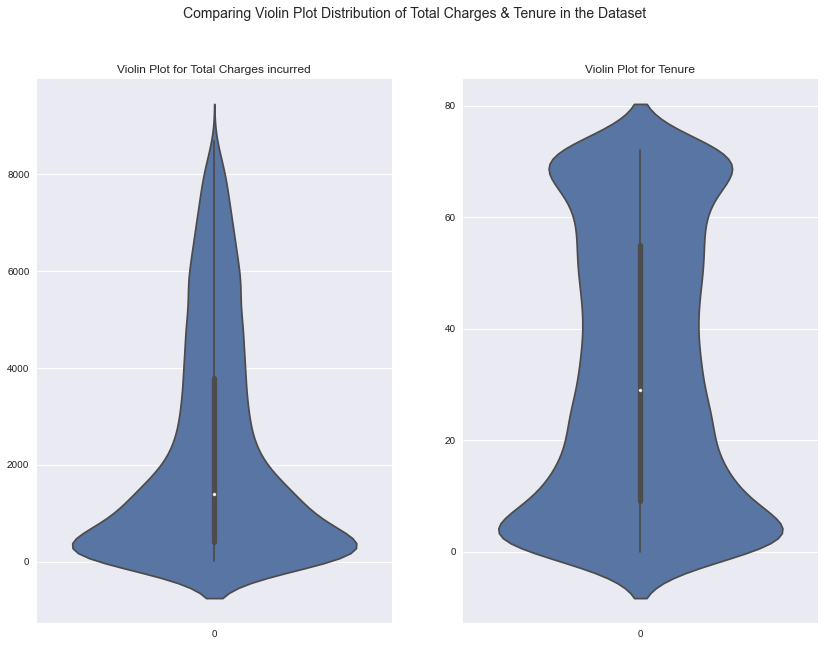

In [26]:
#Comparing the Violin Plots for Tenure and TotalCharges 
fig, axes = plt.subplots(1,2,figsize=(14,10))
fig.suptitle('Comparing Violin Plot Distribution of Total Charges & Tenure in the Dataset',fontsize = 14)
axes[0].set_title('Violin Plot for Total Charges incurred',fontsize = 12)
axes[1].set_title('Violin Plot for Tenure',fontsize = 12)
sns.violinplot(ax = axes[0], data = pdata['TotalCharges'])
sns.violinplot(ax = axes[1], data = pdata['tenure'])
plt.show()

**Box Plots for Tenure and TotalCharges**

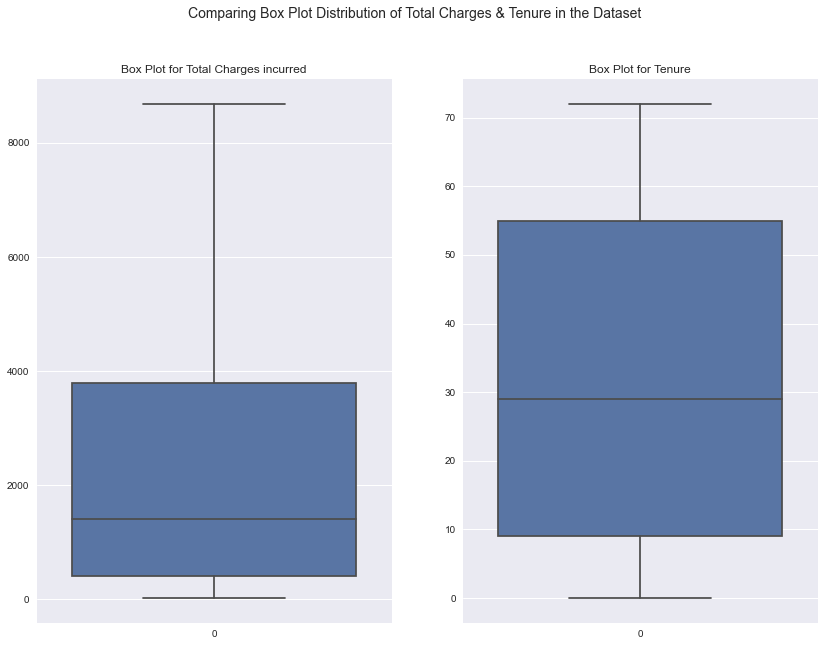

In [27]:
#Comparing the Box Plots for Tenure and TotalCharges 
fig, axes = plt.subplots(1,2,figsize=(14,10))
fig.suptitle('Comparing Box Plot Distribution of Total Charges & Tenure in the Dataset',fontsize = 14)
axes[0].set_title('Box Plot for Total Charges incurred')
axes[1].set_title('Box Plot for Tenure')
sns.boxplot(ax = axes[0], data = pdata['TotalCharges'])
sns.boxplot(ax = axes[1], data = pdata['tenure'])
plt.show()

**Findings**:
1. We see that tenure and Total Charges are fairly correlated. 
2. As tenure of the service increased, the Total Charges incurred also goes up.
3. Most of the Total Charges lies between 250 to 4000 range for about 50% of the customers.
4. IQR of tenure (50% data) lies in a range of 10 to 55 months. After this, customers might Churn.

## 4) Find out which contract preffered by the senior citizen.

In [28]:
contract_sum = (pdata['SeniorCitizen'] == 1).sum()

In [29]:
df_contract = pdata[pdata['SeniorCitizen']==1]
df_contract.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No


In [30]:
#contract count
monthly = (df_contract['Contract'] == 'Month-to-month').sum()
yearly = (df_contract['Contract'] == 'Two year').sum()
two_year = (df_contract['Contract'] == 'One year').sum()
print("{} of the total {} Senior Citizen Customers prefer Monthly Plan.".format(monthly,contract_sum))
print("{} of the total {} Senior Citizen Customers prefer 1 Year Plan.".format(yearly,contract_sum))
print("{} of the total {} Senior Citizen Customers prefer 2 Year Plan.".format(two_year,contract_sum))

807 of the total 1142 Senior Citizen Customers prefer Monthly Plan.
145 of the total 1142 Senior Citizen Customers prefer 1 Year Plan.
190 of the total 1142 Senior Citizen Customers prefer 2 Year Plan.


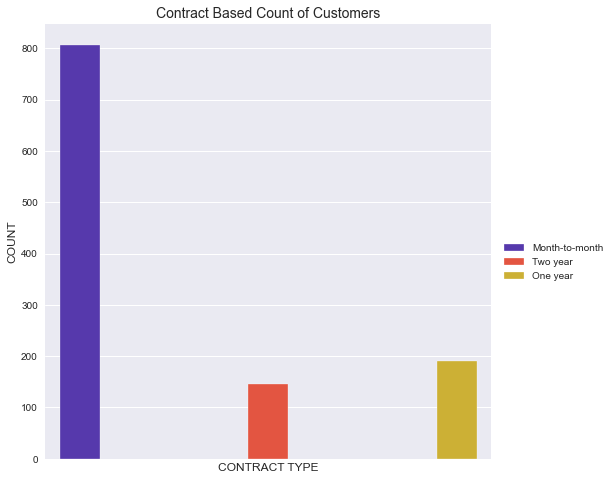

In [31]:
#Count plot for Contract type
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
sns.countplot(x='Contract', data=df_contract, palette='CMRmap',hue='Contract')
plt.title("Contract Based Count of Customers",fontsize=14)
plt.xlabel("CONTRACT TYPE",fontsize=12)
plt.ylabel("COUNT",fontsize=12)
plt.xticks([], [])
plt.legend(loc=(1.02,0.4))
plt.show()

**Findings:**

Among the 1142 Senior Citizens

1. Most of the senior citizens have chosen 'Month-to-month' contract.
2. Only 190 senior citizens have chosen 'One year' contract.
3. 145 senior citizens have chosen 'Two year' contract.

### Pie chart for Contract type

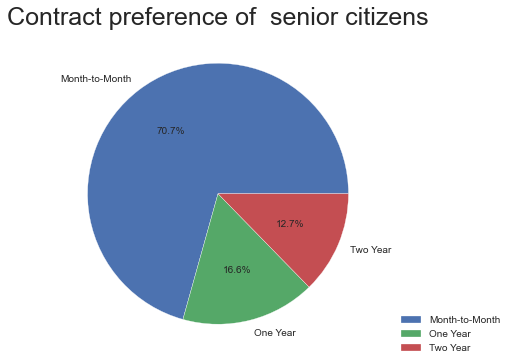

In [32]:
fig=plt.figure(figsize=(6,6))
labels=["Month-to-Month","One Year","Two Year"]
plt.pie(pdata.loc[pdata["SeniorCitizen"]==1,["Contract"]].value_counts(),autopct= "%1.1f%%",labels=labels)
plt.legend(loc=(1.05,0))
plt.title("Contract preference of  senior citizens",fontsize=25)
plt.show()

**Data interpretation**
- 70.7% of the senior citizen preffer month-to-month contract.
- 16.6% of them choose one year contract  
- two year contract preffered by least of them,ie.,12.7%.

## 5) Comment on your finds on Payment Method?

In [33]:
pdata['PaymentMethod'].value_counts().to_frame()

,PaymentMethod
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


Text(0, 0.5, 'Frequency')

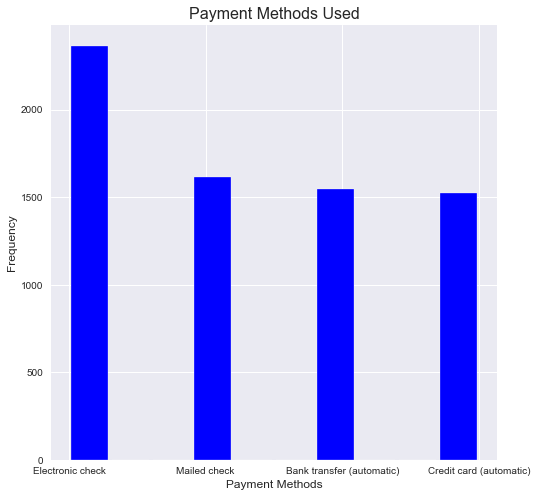

In [34]:
plt.figure(figsize=(8,8))
plt.hist(pdata["PaymentMethod"],color='blue',rwidth=0.9)
plt.title("Payment Methods Used",fontsize=16)
plt.xlabel("Payment Methods",fontsize=12)
plt.ylabel("Frequency",fontsize=12)

**Findings**

Among the 7043 customers,

1. 2365 chosen Electronic check Payment Method
2. 1612 chosen Mailed check Payment Method
3. 1544 chosen Bank transfer (automatic) Payment Method
4. 1522 chosen Credit card (automatic) Payment Method
5. The most used payment method is Electronic Cheque contributing about 34% of the payments.
6. Automatic Credit card payment is the least preferred method (mostly due to the infamous name it has!)

*Mostly used Payment method is Electonic check*

In [ ]:
#Submitted by DSA_B3_GROUP12
#GroupMembers: Akshaya V, Shiffa Saleem, Sujith Narayanan, Sidharth S, Navaneeth R

# END